# Inferência Bayseana

- Nome: Henrique Tibério Brandão Vieira Augusto
- Matrícula: 2186330010
- Turma: 2021-1

**INSTRUÇÕES**:

- **Mantenha a estrutura de enunciados e células de resposta apresentada neste modelo.**
- **Todas as conclusões devem estar fundamentadas com experimentos e análises de dados que corroborem os aspectos afirmados.**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt

from scipy import stats

%matplotlib notebook

___
## Exercício 1

No colab "2 - Inferência", no exemplo "Update Bayesiano com distribuição Beta", foi apresentado um procedimento simplificado de inferência Bayesiana para a distribuição beta. Neste update, os parâmetros $\alpha, \beta$ estão relacionados ao grau de crença sobre a hipótese. Diferentes parametrizações geram diferentes diferentes distribuições que se assemelham às gaussianas, às uniformes e, inclusive, distribuições assimétricas.

No exemplo em questão, o cenário simula a jogada de uma moeda, e, com a coleta de dados a respeito das jogadas, deseja-se tirar conclusões a respeito da moeda. Neste caso, tem-se um _a priori_ modelado por uma distribuição beta e o modelo relativo aos dados (as jogadas da moeda) é implicitamente representado por uma distribuição de Bernoulli. E, por esta razão, sabe-se que o _a posteriori_ também é conhecido, sendo também uma distribuição beta. O conceito utilizado neste caso, é o de **a priori conjugado**: certas configurações de _a priori_ e verossimilhança determinam a forma do _a posteriori_.

**Qual o impacto do _a priori_ e dos parâmetros na inferência?** Faça um estudo de caso a respeito da simluação de diferentes moedas onde o sucesso do experimento de Bernoulli representa a saída de cara na moeda. Analise diferentes valores para o _ground-truth_ $p$ da moeda, diferentes valores para o número de jogadas, e diferentes valores para $\alpha, \beta$. Explore _a prioris_ simétricos, assimétricos, com maiores ou menores magnitudes. Disserte a respeito do impacto desses parâmetros para os resultados obtidos no _a posteriori_.

## # Resposta

Temos nos parâmetros alfa e beta, bem como na sua magnitude, um par que simula de forma discreta a nossa convição sobre o resultado do evento.

Abaixo observamos distribuições beta com valores $\alpha,\beta$ em situações distintas:

<IPython.core.display.Javascript object>


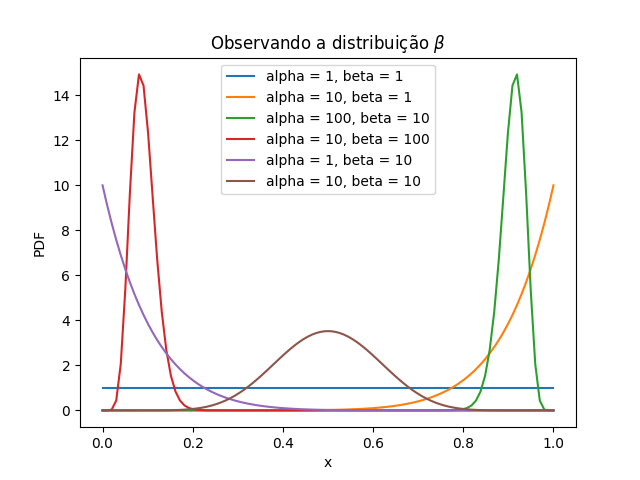

In [3]:
_alfas = [1, 10, 100, 10, 1, 10]
_betas = [1, 1, 10, 100, 10, 10]

x = np.linspace(0, 1, 100)

for _a, _b in zip(_alfas, _betas):
    plt.plot(x, stats.beta(_a, _b).pdf(x))
    plt.xlabel('x')
    plt.ylabel('PDF')

plt.title(r'Observando a distribuição $\beta$')
plt.legend([f'alpha = {_a}, beta = {_b}' for _a,_b in zip(_alfas, _betas)])

plt.show()

Podemos perceber que quanto maior a diferença de magnitude entre $\alpha$ e $\beta$, mais concentrada em uma região a nossa _PDF_ se encontra.

Seguindo para a simulação de jogadas de uma moeda:

In [4]:
def simular_jogadas(alfa, beta, p, jogadas):
    a = alfa
    b = beta
    df = pd.DataFrame({"a": [a], "b": [b]})
    for _ in range(jogadas):
        if np.random.rand() < p: # sucesso?
            # cara -> sucesso
            a, b = df.iloc[-1].values
            a += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)
        else:
            # coroa -> insucesso
            a, b = df.iloc[-1].values
            b += 1
            df = df.append({"a": a, "b": b}, ignore_index=True)
    return df

In [5]:
alfas = [10, 50, 200]
betas = [5, 200, 50]
ground_truths = [0.25, 0.5, 0.75]
num_jogadas = [100, 500, 1000]

<IPython.core.display.Javascript object>


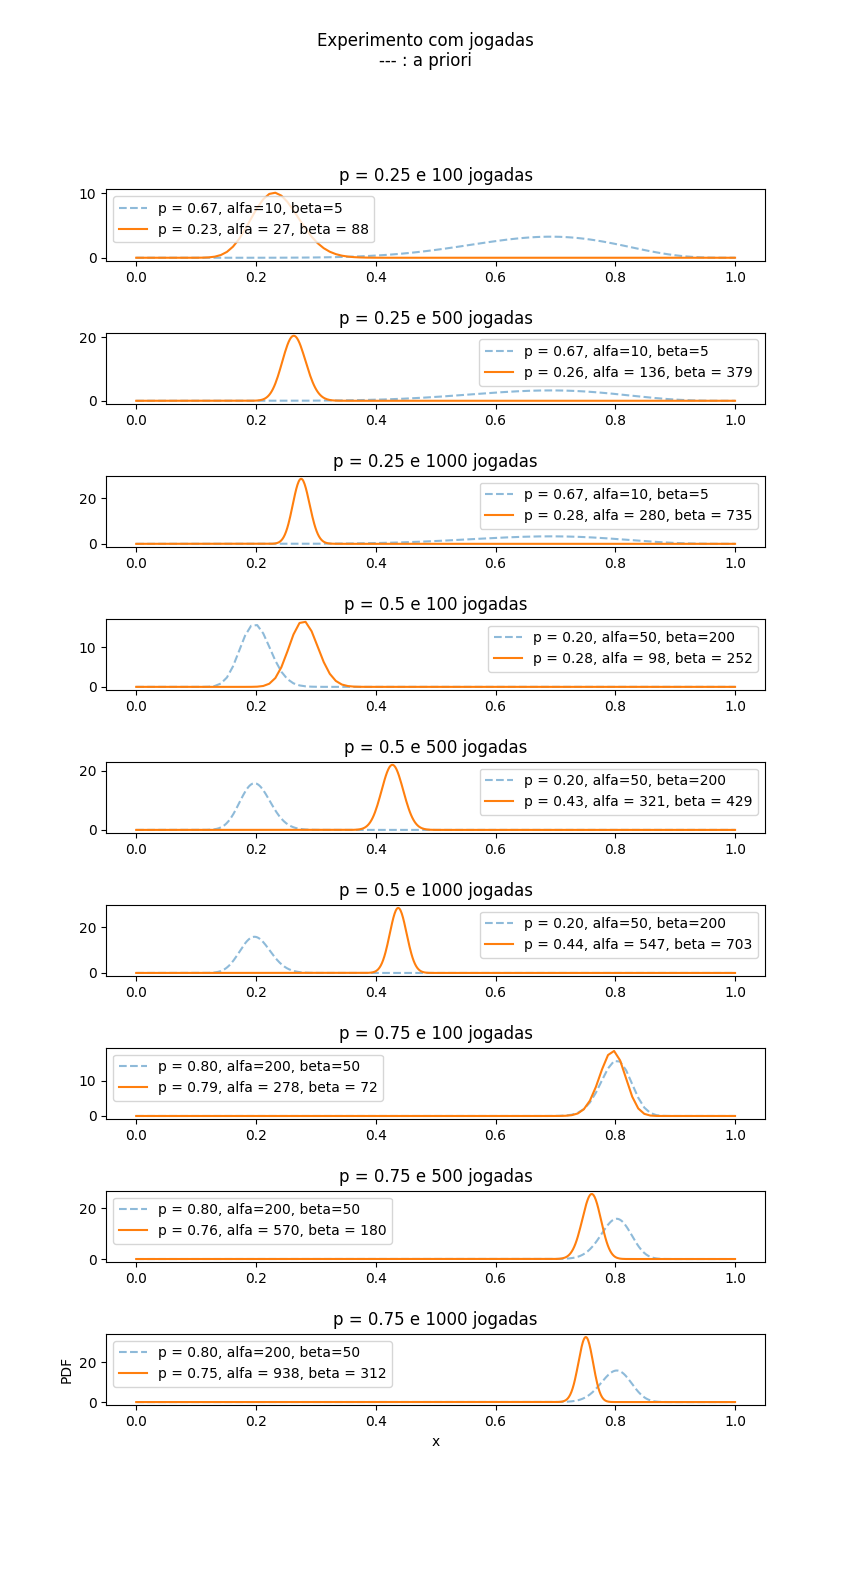

In [6]:
nrows, ncols, nindex = 9, 1, 1

for _a, _b, _p in zip(alfas, betas, ground_truths):
    for _n in num_jogadas:
        plt.subplot(nrows, ncols, nindex)

        x = np.linspace(0, 1, _n)
        # priori
        sns.lineplot(x=x, y=stats.beta(_a, _b).pdf(x), alpha=0.5, linestyle='--')
        # posteriori
        a, b = simular_jogadas(alfa=_a, beta=_b, p=_p, jogadas=_n).iloc[-1].values
        sns.lineplot(x=x, y=stats.beta(a, b).pdf(x))

        plt.title(f'p = {_p} e {_n} jogadas')
        plt.legend([f'p = {_a/(_a+_b):.2f}, alfa={_a}, beta={_b}',
                    f'p = {a/(a+b):.2f}, alfa = {a}, beta = {b}'])
        nindex += 1

plt.suptitle('Experimento com jogadas\n--- : a priori')
plt.xlabel('x')
plt.ylabel('PDF')
plt.subplots_adjust(hspace=1.0)
plt.show()

Variar o _ground truth_, de forma crescente, significa aumentar a nossa possibilidade de um resultado favorável ("cara"), nos dá um viés.

Quanto à $\alpha,\beta$, podemos notar que mesmo na situação em que um $\alpha,\beta = 5, 10$, embora um tenha o dobro do valor do outro, suas magnitudes (i.e., confiança) ainda são pequenas, nos dando curvas relativamente abertas, i.e., "espalhando" as probabilidades do nosso _a priori_ (crença inicial); uma vez que suas magnitudes aumentam, a curva tende a ficar mais concentrada em uma região.

Sobre a quantiade de jogadas, observamos que este valor tende a acentuar a representação do resultado, quanto mais simulações são feitas, mais o resultado novo tende a reforçar o significado do resultado anterior.



___
## Exercício 2

No colab "2 - Inferência", no tópico "Exemplo da altura dos programdores Python" foi apresentada uma modelagem para inferência que usava de referência a altura média da população do planeta como _a priori_ para a inferência da média do _a posteriori_. Pra a inferência da variância da distribuição, foi utilizado um _a priori_ não informado.

Implemente um cenário semelhante, onde a amostra de alturas coletadas seja dada por uma Gaussiana de média 180 e variância 9. O tamanho da amostra deve ser a altura de 100 programadores. Faça uma inferência em grid da média e variância do _a posteriori_ considerando tanto _a priori_'s desinformados para média e variância, quanto _a priori_'s a partir das informações prévias de média e variância da altura das pessoas do planeta. **Analise as diferenças entre os _a posteriori_ obtidos**.

## # Resposta

In [4]:
MEDIA = 180
VARIANCIA = 9

In [5]:
amostra = np.random.normal(loc=MEDIA, scale=VARIANCIA, size=100)

print('# amostra de alturas\n'
      + f'tamanho = {len(amostra)}, média = {amostra.mean():.2f}, variância = {amostra.std():.2f}')

# amostra de alturas
tamanho = 100, média = 179.67, variância = 8.42


<IPython.core.display.Javascript object>


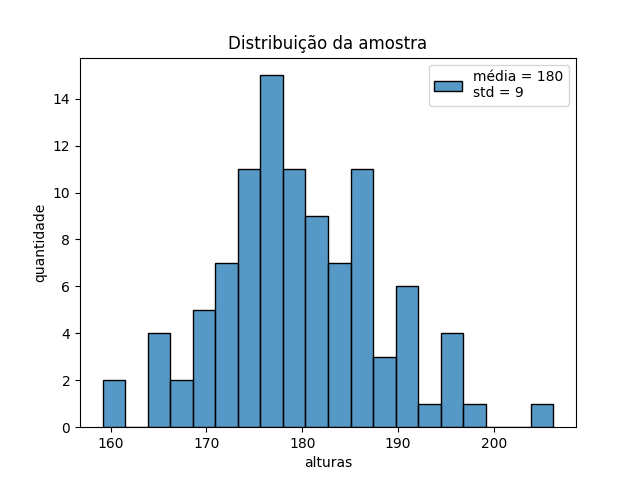

In [7]:
plt.title(f'Distribuição da amostra')
sns.histplot(amostra, bins=20)
plt.legend([f'média = {MEDIA}\nstd = {VARIANCIA}'])
plt.xlabel('alturas')
plt.ylabel('quantidade')
plt.show()

Realizar uma inferência em _grid_ da média e variância do _a posteriori_ para cenários _a priori_:
- Desinformado;
- Informado: Utilizando média e std mundial

- `Desinformado`:

In [12]:
x = amostra
world_height_mean = 165
world_height_standard_deviation = 7
min_sigma = .01
max_sigma = 25.
mu_candidates = np.linspace(0., 272, 100)
sigma_candidates = np.linspace(min_sigma, max_sigma, 100)

def posterior(mu, sigma, x):
    mu_prior = stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
    sigma_prior = stats.uniform.logpdf(sigma, min_sigma, max_sigma)
    return mu_prior + sigma_prior + stats.norm.logpdf(x, mu, sigma).sum()

def compute_posteriors(mu_candidates, sigma_candidates, x):
    for mu in mu_candidates:
        for sigma in sigma_candidates:
            yield mu, sigma, posterior(mu, sigma, x)

%time results = list(compute_posteriors(mu_candidates, sigma_candidates, x))
results = pd.DataFrame(results, columns=('mu', 'sigma', 'posterior')).set_index(['mu', 'sigma'])['posterior']

best_mu, best_sigma = results.idxmax('posterior')
print('A média mais provável: %.2f\nO desvio padrão mais provável: %.2f' % (best_mu, best_sigma))

CPU times: user 2.64 s, sys: 16.6 ms, total: 2.65 s
Wall time: 2.63 s
A média mais provável: 178.59
O desvio padrão mais provável: 8.59


- `Informado`:

In [9]:
# palpite_altura_mean = 165
# palpite_altura_std = 7

# x = amostra
# world_height_mean = palpite_altura_mean
# world_height_standard_deviation = palpite_altura_mean
# mu_candidates = [165]
# sigma_candidates = [7]

# def posterior(mu, sigma, x):
#     mu_prior = stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
#     sigma_prior = stats.uniform.logpdf(sigma, min_sigma, max_sigma)
#     return mu_prior + sigma_prior + stats.norm.logpdf(x, mu, sigma).sum()

# def compute_posteriors(mu_candidates, sigma_candidates, x):
#     for mu in mu_candidates:
#         for sigma in sigma_candidates:
#             yield mu, sigma, posterior(mu, sigma, x)

# %time results = list(compute_posteriors(mu_candidates, sigma_candidates, x))
# results = pd.DataFrame(results, columns=('mu', 'sigma', 'posterior')).set_index(['mu', 'sigma'])['posterior']

# best_mu, best_sigma = results.idxmax('posterior')
# print('A média mais provável: %.2f\nO desvio padrão mais provável: %.2f' % (best_mu, best_sigma))

In [13]:
# x = amostra
# world_height_mean = 165
# world_height_standard_deviation = 7
# mu_candidates = np.linspace(0., 272, 1000)
# sigma = 7.

# def posterior(mu, sigma, x):
#     # A multiplicação por 2 é para deixar o prior menos específico
#     # Os logaritmos transformam multiplicação em soma
#     mu_prior = stats.norm.logpdf(mu, world_height_mean, world_height_standard_deviation * 2)
#     return mu_prior + stats.norm.logpdf(x, mu, sigma).sum()
    
# def compute_posteriors(mu_candidates, sigma, x):
#     for mu in mu_candidates:
#         yield posterior(mu, sigma, x)

# %time posteriors = list(compute_posteriors(mu_candidates, sigma, x))

# print('A média de altura mais provável: %.2f' % mu_candidates[np.argmax(posteriors)])

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 188 ms
A média de altura mais provável: 179.70


In [14]:
# x = amostra
# min_sigma = .01
# max_sigma = 25.
# # O desvio padrão não pode ser 0, então evita-se este valor.
# sigma_candidates = np.linspace(min_sigma, max_sigma, 1000)
# mu = 180.

# def posterior(mu, sigma, x):
#     sigma_prior = stats.uniform.logpdf(sigma, min_sigma, max_sigma)
#     return sigma_prior + stats.norm.logpdf(x, mu, sigma).sum()

# def compute_posteriors(mu, sigma_candidates, x):
#     for sigma in sigma_candidates:
#         yield posterior(mu, sigma, x)

# %time posteriors = list(compute_posteriors(mu, sigma_candidates, x))

# print('O desvio padrão mais provável para as alturas: %.2f' % sigma_candidates[np.argmax(posteriors)])

CPU times: user 192 ms, sys: 0 ns, total: 192 ms
Wall time: 189 ms
O desvio padrão mais provável para as alturas: 8.42


<timed exec>:1: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [height_standard_deviation, height_mean]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 5 seconds.


CPU times: user 5.13 s, sys: 252 ms, total: 5.38 s
Wall time: 7.18 s


<ipython-input-35-c0a1815464a9>:18: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pymc3.traceplot(traces);
/home/hbrandao/Projects/post-grad-iesb-ai/venv/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<IPython.core.display.Javascript object>


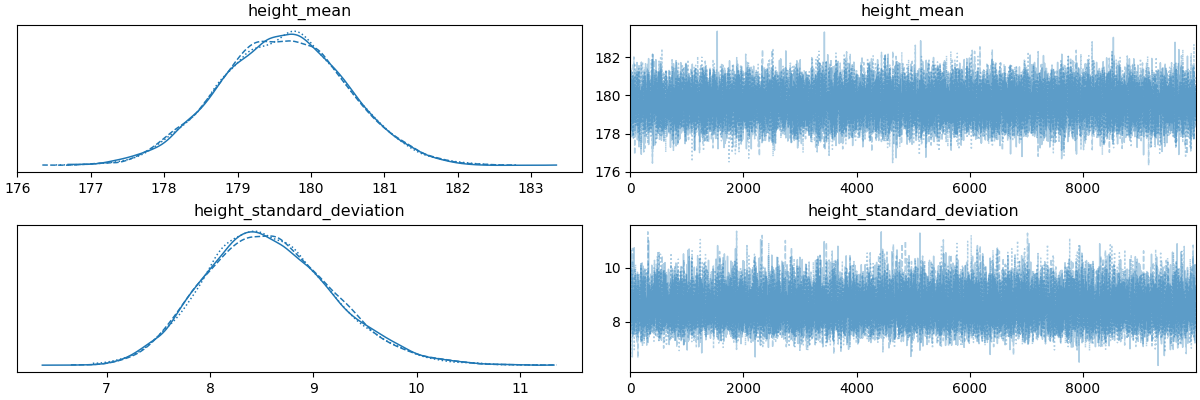

In [35]:
import pymc3

x = amostra

world_height_mean = 165
world_height_standard_deviation = 7

with pymc3.Model() as model:
    height_mean = pymc3.Normal('height_mean', world_height_mean, world_height_standard_deviation * 2)
    height_standard_deviation = pymc3.Uniform('height_standard_deviation', 0., world_height_standard_deviation * 5)
    python_programmers_height = pymc3.Normal('python_programmers_height',
                                             height_mean,
                                             height_standard_deviation,
                                             observed=x)

    %time traces = pymc3.sample(10000, step=pymc3.NUTS())

pymc3.traceplot(traces);

- Desinformado:
    - A média mais provável: 178.59
    - O desvio padrão mais provável: 8.59
- Informado:
    - A média de altura mais provável: 179.70
    - O desvio padrão mais provável para as alturas: 8.42


In [19]:
inf_media, inf_std = 179.70, 8.42
desin_media, desin_std = 178.59, 8.59

In [31]:
delta_inf = (MEDIA - inf_media) + (VARIANCIA - inf_std)
delta_desinf = (MEDIA - desin_media) + (VARIANCIA - desin_std )

f'Informado = {delta_inf:.2f}, Desinformado = {delta_desinf:.2f}'

'Informado = 0.88, Desinformado = 1.82'

In [28]:
 delta_inf < delta_desinf, f'{(delta_desinf/delta_inf):.2f}'

(True, '2.07')

Tendo em vista que, por construção, temos um par média e variância de $(180,9)$ para nossa amostra, podemos observar que as distância entres os respectivos valores, e as aproximações obtidas através do _a priori_ informado resultou numa distância total menor, assim, sendo mais eficiente.

___
## Exercício 3

Implemente um modelo de VAE Gaussiano para uma base de escolha do grupo, que seja diferente da apresentada na sala de aula. Treine este modelo em um latente de tamanho arbitrário (de dimensionalidade 3 ou maior). Exiba as propriedades do modelo treinado para geração de amostras com a combinação das principais características atreladas aos agrupamentos do espaço latente. 

Para tal, utilize o procedimento de encontrar os vetores de média dos dois tipos de dados sobre os quais deseja-se gerar a amostra combinada e gere o vetor apropriado para o decoder que represente combinações das características em questão.

Exiba alguns exemplos gerados a partir das combinações escolhidas.

## # Resposta

In [1]:
import numpy as np

from os import path
from glob import glob

from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.losses import mse, binary_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose,\
    Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout,\
    AveragePooling2D, UpSampling2D

In [2]:
DATA_FOLDER = '/home/hbrandao/Downloads/celeba-dataset/img_align_celeba/'

In [3]:
filenames = np.array(glob(path.join(DATA_FOLDER, '*/*.jpg')))
NUM_IMAGES = len(filenames)
print("Total number of images : " + str(NUM_IMAGES))
# prints : Total number of images : 202599

Total number of images : 202599


In [4]:
TARGET_SIZE = (64, 64)

In [5]:
INPUT_DIM = (128,128,3)
BATCH_SIZE = 512
Z_DIM = 200

data_flow = ImageDataGenerator(rescale=1./255).flow_from_directory(DATA_FOLDER,
                                                                   target_size = TARGET_SIZE,
                                                                   batch_size = BATCH_SIZE,
                                                                   shuffle = True,
                                                                   class_mode = 'input',
                                                                   subset = 'training'
                                                                   )

Found 202599 images belonging to 1 classes.


In [6]:
PIC_SIZE = TARGET_SIZE[0]

In [7]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [9]:
def create_VAE(input_shape):
    # CREATING THE VAE NETWORK
    image_size = input_shape[1]
    original_dim = image_size * image_size
    inputs = Input(shape=input_shape)
#     print(inputs.shape)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
#     print(x.shape)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = AveragePooling2D(pool_size=(2, 2))(x)
#     print(x.shape)
    x = Dropout(0.2)(x)

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = AveragePooling2D(pool_size=(2, 2))(x)
#     print(x.shape)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = AveragePooling2D(pool_size=(2, 2))(x)
#     print(x.shape)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)
#     print(x.shape)
    x = Dense(PIC_SIZE, activation='relu')(x)
#     print(x.shape)
    
    latent_dim = 20
    
    latent_mean = Dense(latent_dim)(x)
#     print(latent_mean.shape)
    latent_log_variance = Dense(latent_dim)(x)
#     print(latent_log_variance.shape)
    
    latent_sample = Lambda(sampling)([latent_mean, latent_log_variance])
#     print(latent_sample.shape)
    
    # BUILDING THE ENCODER
    encoder = Model(inputs, [latent_mean, latent_log_variance, latent_sample])
    
    latent_inputs = Input(shape=(latent_dim,))
#     print(latent_inputs.shape)
    x = Dense(8*8*PIC_SIZE, activation='relu')(latent_inputs)
#     print(x.shape)
    x = Reshape((8,8,PIC_SIZE))(x)
#     print(x.shape)
    x = UpSampling2D((2, 2))(x)
#     print(x.shape)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    
    x = UpSampling2D((2, 2))(x)
#     print(x.shape)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    
    x = UpSampling2D((2, 2))(x)
#     print(x.shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     print(x.shape)

    # Outputs for the encoder by a sigmoid activation function
    outputs = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
#     print(outputs.shape)
    
    # BUILDING THE DECODER
    decoder = Model(latent_inputs, outputs)
    
    # The outputs of the decoder are taken as the inputs of the encoder
    outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, outputs)
    
    # The losses of the VAE model is taken as the sum of the (binary cross entropy *dimensions) and the kl divergence loss
    reconstruction_loss = binary_crossentropy(inputs, outputs) * original_dim
    reconstruction_loss = K.mean(reconstruction_loss)
#     print(reconstruction_loss)
    
    kl_loss = 1 + latent_log_variance - K.square(latent_mean) - K.exp(latent_log_variance)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
#     print(kl_loss)
    vae_loss = K.mean(reconstruction_loss + kl_loss)
#     print(vae_loss)
    vae.add_loss(vae_loss)
    return vae, encoder, decoder

In [10]:
vae, encoder, decoder = create_VAE(input_shape=(PIC_SIZE, PIC_SIZE, 3))
vae.compile(optimizer='adam', metrics=['accuracy'])

In [13]:
LEARNING_RATE = 0.0005
N_EPOCHS = 2
LOSS_FACTOR = 10000

In [ ]:
vae.fit_generator(data_flow,
                  shuffle=True,
                  epochs=N_EPOCHS,
                  initial_epoch=0,)#steps_per_epoch=NUM_IMAGES/BATCH_SIZE)

Epoch 1/2
396/396 [==============================] - 5541s 14s/step - loss: 2353.3694 - accuracy: 0.7452
Epoch 2/2
388/396 [============================>.] - ETA: 1:51 - loss: 2242.7434 - accuracy: 0.7418

<IPython.core.display.Javascript object>


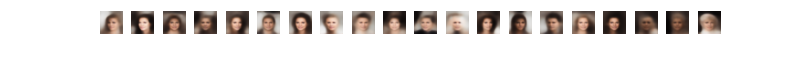

In [54]:
def vae_generate_images(n_to_show: int):
    reconst_images = decoder.predict(np.random.normal(0,1,size=(n_to_show,20)))
    fig = plt.figure(figsize=(10, 1))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(n_to_show):
        img = reconst_images[i].squeeze()
        sub = fig.add_subplot(2, n_to_show, i+1)
        sub.axis('off')        
        sub.imshow(img)

    return reconst_images

reconst_images = vae_generate_images(n_to_show=20)

<IPython.core.display.Javascript object>


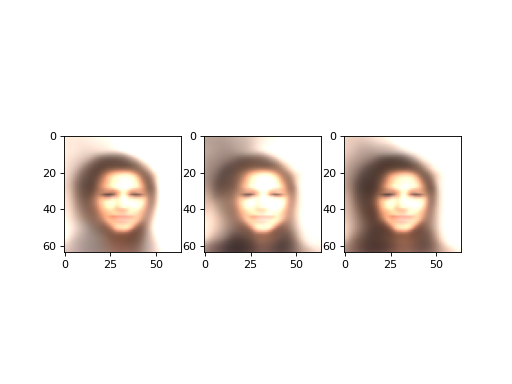

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [44]:
t1 = reconst_images[0] + (reconst_images[0] + reconst_images[1])/2
tt = reconst_images[0] + (reconst_images[0] + reconst_images[2])/2
ttt = reconst_images[0] + (reconst_images[0] + reconst_images[7])/2


i = 1
plt.subplot(1, 3, i)
for t in [t, tt, ttt]:
    plt.subplot(1, 3, i)
    plt.imshow(t)
    i += 1

___

___
## Exercício 4

Implemente uma arquitetura de rede neural profunda Bayesiana com a biblioteca Pyro em algum dataset de escolha do grupo. Avalie a robustez da rede neural bayesiana usando a estratégia de amostragem de redes neurais apresentada em sala de aula.

Disserte a respeito do desempenho do modelo treinado em um dataset de validação atrelado ao dataset de treinamento. Avalie também o comportamento da rede neural para padrões de dados diferentes dos dados utilizados para treinamento. Desde dados levemente diferentes a dados completamente diferentes.

Neste contexto, disserte a respeito das ocasiões onde a rede neural chegou a uma classificação quando não deveria classificar o dado e vice-versa, quando a rede neural não classificou dados que deveria ser capaz de classificar. Através da estratégia de composição de distribuições para as previsões da rede neural, também considere nas avaliações diferentes limiares de incerteza para considerar que houve uma predição ou não da rede neural Bayesiana para o dado em questão.

## # Resposta